## Predict numerical target variable - Spending
#### Allison Liu
2023/11/06

#### Import necessary library

In [2]:
import warnings

# Use filterwarnings to suppress specific warning
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Ignore DeprecationWarning
warnings.filterwarnings("ignore", category=FutureWarning)       # Ignore FutureWarning

In [3]:
warnings.filterwarnings("ignore", category=FutureWarning)
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, cohen_kappa_score, roc_auc_score, auc
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, roc_curve, average_precision_score, matthews_corrcoef, make_scorer
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, StackingRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

In [4]:
data = pd.read_excel('HW3.xlsx')

In [5]:
data

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,0,0,0,0,0,0,0,0,...,0,0,1,1701,1701,1,0,0,1,29.50
1996,1997,1,0,0,0,0,0,0,0,0,...,0,0,1,2633,2633,1,1,0,1,10.00
1997,1998,1,0,0,0,0,0,0,0,0,...,0,0,0,3394,3394,0,0,0,0,0.00
1998,1999,1,0,0,0,0,0,0,0,0,...,0,1,1,253,253,0,1,1,0,0.06


In [6]:
data.columns

Index(['sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'],
      dtype='object')

In [7]:
df = data.drop(['sequence_number', 'Purchase'], axis=1)

In [8]:
X = df.drop(['Spending'], axis=1)
Y = df['Spending']

In [9]:
X.shape

(2000, 22)

In [10]:
X

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,3662,3662,1,0,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,2900,2900,1,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,3883,3914,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,829,829,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,869,869,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1701,1701,1,0,0
1996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2633,2633,1,1,0
1997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3394,3394,0,0,0
1998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,253,253,0,1,1


In [11]:
Y.shape

(2000,)

In [12]:
Y

0       127.87
1         0.00
2       127.48
3         0.00
4         0.00
         ...  
1995     29.50
1996     10.00
1997      0.00
1998      0.06
1999      0.14
Name: Spending, Length: 2000, dtype: float64

<AxesSubplot:>

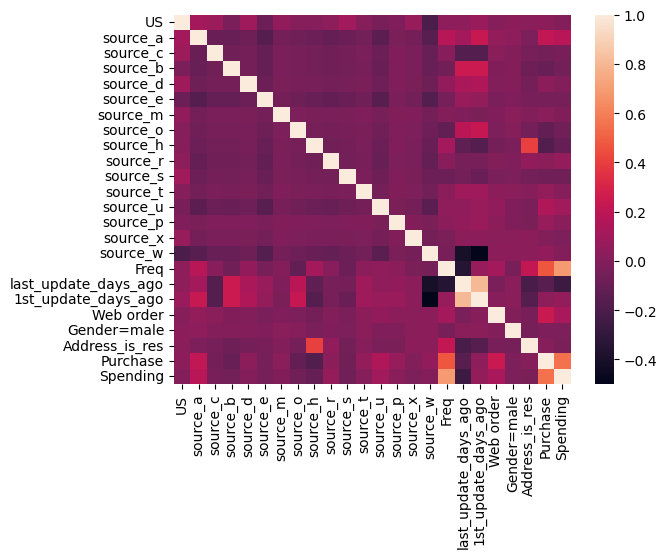

In [140]:
import seaborn as sns
sns.heatmap(data.drop(['sequence_number'], axis=1).corr())

### Part1: Build the numeric predictive models to predict Spending

Models: 
1. Linear regression 
2. K-NN
3. Regression tree 
4. SVM regression
5. Neural Network
6. Ensembling models - Random forest, Stacking, Gradient Boosting

In [55]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [56]:
warnings.filterwarnings("ignore")
#Define the inner and outer loops
inner_cv = KFold(n_splits = 5, shuffle=True, random_state=1)
outer_cv = KFold(n_splits = 5, shuffle=True, random_state=1)

#Set the hyperparameters of separate models
rt_grid = {'max_depth':range(1,21),
          'min_samples_leaf':range(1,21)}

lr_grid = {'l1_ratio':[0, 1, 0.01],
           'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

knn_grid = {'n_neighbors':range(1,21),
            'leaf_size':range(1,11),
            'weights':['uniform']}

svr_grid = {"C": [1, 10, 100],
            "gamma": [.01, .1],
            'kernel': ['rbf', 'poly', 'linear']}

rt = DecisionTreeRegressor()
lr = ElasticNet()
knn = KNeighborsRegressor()
svm = SVR()

#Create inner loop cv using GridSearchCV
rt_clf = GridSearchCV(estimator=rt, param_grid=rt_grid, cv=inner_cv, scoring='neg_mean_squared_error')
lr_clf = GridSearchCV(estimator=lr, param_grid=lr_grid, cv=inner_cv, scoring='neg_mean_squared_error')
knn_clf = GridSearchCV(estimator=knn, param_grid=knn_grid, cv=inner_cv, scoring='neg_mean_squared_error')
svr_clf = GridSearchCV(estimator=svm, param_grid=svr_grid, cv=inner_cv, scoring='neg_mean_squared_error')

#Create outer loop cv using cross_val_score
rt_score = cross_val_score(rt_clf, X=X, y=Y, cv=outer_cv)
print("Mean score of Regression tree:\n", rt_score.mean())

lr_score = cross_val_score(lr_clf, X=X, y=Y, cv=outer_cv)
print("Mean score of Linear regression:\n", lr_score.mean())

knn_score = cross_val_score(knn_clf, X=X_norm, y=Y, cv=outer_cv)
print("Mean score of KNN:\n", knn_score.mean())

svr_score = cross_val_score(svr_clf, X=X_norm, y=Y, cv=outer_cv)
print("Mean score of SVR:\n", svr_score.mean())

Mean score of Regression tree:
 -17046.572691950365
Mean score of Linear regression:
 -16387.12740588294
Mean score of KNN:
 -21404.43015011536
Mean score of SVR:
 -18279.139067163673


#### Ensembling models

In [31]:
inner_cv = KFold(n_splits = 5, shuffle=True, random_state=1)
outer_cv = KFold(n_splits = 5, shuffle=True, random_state=1)

estimators = [
    ('rf', RandomForestRegressor(n_estimators=10, random_state=1)),
    ('svr', make_pipeline(StandardScaler(), SVR())),
    ('rt', DecisionTreeRegressor(max_depth=5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=8)))
]
params = {'rf__n_estimators': [10, 50],
         'svr__svr__C':[0.1, 1, 10],
         'rt__max_depth':list(range(2,6))}

srlf = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
bagclf = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=10, random_state=1)
xgbclf = GradientBoostingRegressor(n_estimators=10, random_state=1)

sr_grid = GridSearchCV(estimator=srlf, param_grid=params, cv=inner_cv, scoring='neg_mean_squared_error')
bag_grid = GridSearchCV(estimator=bagclf, param_grid={'n_estimators': [10, 50]}, cv=inner_cv, scoring='neg_mean_squared_error')
xgb_grid = GridSearchCV(estimator=xgbclf, param_grid={'n_estimators': [10, 50]}, cv=inner_cv, scoring='neg_mean_squared_error')

sr_grid.fit(X, Y)
bag_grid.fit(X, Y)
xgb_grid.fit(X, Y)

#print('Best parameters - Stacking Regressor: %s' % grid.best_params_)
print('Mean Squared Error - Stacking Regressor: %.2f' % sr_grid.best_score_)

#print('Best parameters - Bagging Regressor: %s' % bag_grid.best_params_)
print('Mean Squared Error - Bagging Regressor: %.2f' % bag_grid.best_score_)

#print('Best parameters - GradientBoosting Regressor: %s' % xgb_grid.best_params_)
print('Mean Squared Error - GradientBoosting Regressor: %.2f' % xgb_grid.best_score_)

Mean Squared Error - Stacking Regressor: -15861.71
Mean Squared Error - Bagging Regressor: -16364.37
Mean Squared Error - GradientBoosting Regressor: -15852.32


#### Neural network

In [45]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Dropout
from scikeras.wrappers import KerasRegressor, KerasClassifier
from tensorflow.keras.utils import to_categorical
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [46]:
def create_model(activation='relu', nb_hidden=100, batch_size=64, epochs=3):
    model = Sequential()
    model.add(Dense(nb_hidden, input_dim=X.shape[1], activation=activation))
    model.add(Dropout(rate=0.2))
    model.add(Dense(nb_hidden, input_dim=X.shape[1], activation=activation))
    model.add(Dropout(rate=0.2))
    model.add(Dense(nb_hidden, input_dim=X.shape[1], activation=activation))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

#activations = ['relu', 'sigmoid', 'linear']
#nb_hiddens = [100, 200]
#epochs = list(range(3, 10))
inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)
params = {
    "model__batch_size": [8,16,64],
    "model__optimizer__learning_rate": [0.001, 0.01, 0.1],
    "model__epochs" : list(range(3, 10))
}

#param_grid = dict(nb_hidden=nb_hiddens, epochs=epochs)
model = KerasRegressor(build_fn=create_model, batch_size=256, verbose=0)

clf = GridSearchCV(estimator=model, param_grid=params, cv=inner_cv, scoring='neg_mean_squared_error')
res = clf.fit(X, Y)

print(res.best_score_, res.best_params_)

-30256.898479336378 {'model__batch_size': 8, 'model__epochs': 3, 'model__optimizer__learning_rate': 0.001}


Reference:  
https://coderzcolumn.com/tutorials/artificial-intelligence/scikeras-give-scikit-learn-like-api-to-your-keras-networks  
https://www.kaggle.com/code/neerajmohan/scikeras-tensorflow-model-with-sklearn-interface

### Part 2: Build the numeric predictive models with purchase (1, 0) to predict Spending

In [29]:
data2 = data.drop(['sequence_number'], axis=1)

In [30]:
data2

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,0,0,1,0,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,127.87
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0.00
2,1,0,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127.48
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0.00
4,1,0,1,0,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1701,1701,1,0,0,1,29.50
1996,1,0,0,0,0,0,0,0,0,0,...,0,0,1,2633,2633,1,1,0,1,10.00
1997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,3394,3394,0,0,0,0,0.00
1998,1,0,0,0,0,0,0,0,0,0,...,0,1,1,253,253,0,1,1,0,0.06


In [31]:
data2 = data2[data2['Purchase'] == 1]

In [32]:
X2 = data2.drop(['Spending'], axis=1)

In [33]:
X2

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,3662,3662,1,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3883,3914,0,0,0,1
8,1,1,0,0,0,0,0,0,0,0,...,0,0,0,4,525,2914,1,1,0,1
9,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,3215,3215,0,0,0,1
13,1,1,0,0,0,0,0,0,0,0,...,0,0,0,5,2081,2438,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2807,2807,0,1,0,1
1992,1,0,0,0,0,0,0,1,0,0,...,0,0,0,2,2466,3747,0,1,0,1
1994,1,0,0,0,0,1,0,0,0,0,...,0,0,0,2,1136,1400,0,1,0,1
1995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1701,1701,1,0,0,1


In [39]:
X2.shape

(1000, 23)

In [34]:
Y2 = data2['Spending']

In [40]:
Y2.shape

(1000,)

In [41]:
scaler = StandardScaler()
X2_norm = scaler.fit_transform(X2)

In [42]:
warnings.filterwarnings("ignore")
#Define the inner and outer loops
inner_cv = KFold(n_splits = 5, shuffle=True, random_state=1)
outer_cv = KFold(n_splits = 5, shuffle=True, random_state=1)

#Set the hyperparameters of separate models
rt_grid = {'max_depth':range(1,21),
          'min_samples_leaf':range(1,21)}

lr_grid = {'l1_ratio':[0, 1, 0.01],
           'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

knn_grid = {'n_neighbors':range(1,21),
            'leaf_size':range(1,11),
            'weights':['uniform']}

svr_grid = {"C": [1, 10, 100],
            "gamma": [.01, .1],
            'kernel': ['rbf', 'poly', 'linear']}

rt = DecisionTreeRegressor()
lr = ElasticNet()
knn = KNeighborsRegressor()
svm = SVR()

#Create inner loop cv using GridSearchCV
rt_clf = GridSearchCV(estimator=rt, param_grid=rt_grid, cv=inner_cv, scoring='neg_mean_squared_error')
lr_clf = GridSearchCV(estimator=lr, param_grid=lr_grid, cv=inner_cv, scoring='neg_mean_squared_error')
knn_clf = GridSearchCV(estimator=knn, param_grid=knn_grid, cv=inner_cv, scoring='neg_mean_squared_error')
svr_clf = GridSearchCV(estimator=svm, param_grid=svr_grid, cv=inner_cv, scoring='neg_mean_squared_error')

#Create outer loop cv using cross_val_score
rt_score = cross_val_score(rt_clf, X=X2, y=Y2, cv=outer_cv)
print("Mean score of Regression tree:\n", rt_score.mean())

lr_score = cross_val_score(lr_clf, X=X2, y=Y2, cv=outer_cv)
print("Mean score of Linear regression:\n", lr_score.mean())

knn_score = cross_val_score(knn_clf, X=X2_norm, y=Y2, cv=outer_cv)
print("Mean score of KNN:\n", knn_score.mean())

svr_score = cross_val_score(svr_clf, X=X2_norm, y=Y2, cv=outer_cv)
print("Mean score of SVR:\n", svr_score.mean())

Mean score of Regression tree:
 -32329.368597377666
Mean score of Linear regression:
 -26907.82632470708
Mean score of KNN:
 -34003.12869971122
Mean score of SVR:
 -29162.647867979125


#### Ensenble models

In [43]:
inner_cv = KFold(n_splits = 5, shuffle=True, random_state=1)
outer_cv = KFold(n_splits = 5, shuffle=True, random_state=1)

estimators = [
    ('rf', RandomForestRegressor(n_estimators=10, random_state=1)),
    ('svr', make_pipeline(StandardScaler(), SVR())),
    ('rt', DecisionTreeRegressor(max_depth=5)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=8)))
]
params = {'rf__n_estimators': [10, 50],
         'svr__svr__C':[0.1, 1, 10],
         'rt__max_depth':list(range(2,6))}

srlf = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
bagclf = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=10, random_state=1)
xgbclf = GradientBoostingRegressor(n_estimators=10, random_state=1)

sr_grid = GridSearchCV(estimator=srlf, param_grid=params, cv=inner_cv, scoring='neg_mean_squared_error')
bag_grid = GridSearchCV(estimator=bagclf, param_grid={'n_estimators': [10, 50]}, cv=inner_cv, scoring='neg_mean_squared_error')
xgb_grid = GridSearchCV(estimator=xgbclf, param_grid={'n_estimators': [10, 50]}, cv=inner_cv, scoring='neg_mean_squared_error')

sr_grid.fit(X2, Y2)
bag_grid.fit(X2, Y2)
xgb_grid.fit(X2, Y2)

print('Best parameters - Stacking Regressor: %s' % sr_grid.best_params_)
print('Mean Squared Error - Stacking Regressor: %.2f' % sr_grid.best_score_)

print('Best parameters - Bagging Regressor: %s' % bag_grid.best_params_)
print('Mean Squared Error - Bagging Regressor: %.2f' % bag_grid.best_score_)

print('Best parameters - GradientBoosting Regressor: %s' % xgb_grid.best_params_)
print('Mean Squared Error - GradientBoosting Regressor: %.2f' % xgb_grid.best_score_)

Best parameters - Stacking Regressor: {'rf__n_estimators': 50, 'rt__max_depth': 2, 'svr__svr__C': 10}
Mean Squared Error - Stacking Regressor: -26655.39
Best parameters - Bagging Regressor: {'n_estimators': 50}
Mean Squared Error - Bagging Regressor: -26585.49
Best parameters - GradientBoosting Regressor: {'n_estimators': 50}
Mean Squared Error - GradientBoosting Regressor: -25268.72


#### Neural network

In [48]:
def create_model(activation='relu', nb_hidden=100, batch_size=64, epochs=3):
    model = Sequential()
    model.add(Dense(nb_hidden, input_dim=X2.shape[1], activation=activation))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

#activations = ['relu', 'sigmoid', 'linear']
#nb_hiddens = [100, 200]
#epochs = list(range(3, 10))
inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)
params = {
    "model__batch_size": [8,16,64],
    "model__optimizer__learning_rate": [0.001, 0.01, 0.1],
    "model__epochs" : list(range(3, 10))
}

#param_grid = dict(nb_hidden=nb_hiddens, epochs=epochs)
model = KerasRegressor(build_fn=create_model, batch_size=256, verbose=0)

clf = GridSearchCV(estimator=model, param_grid=params, cv=inner_cv, scoring='neg_mean_squared_error')
res = clf.fit(X2, Y2)

print(res.best_score_, res.best_params_)

-50316.50247013506 {'model__batch_size': 64, 'model__epochs': 9, 'model__optimizer__learning_rate': 0.1}


### Part3: Comparison the models' performance between the one with "purchase" and without "purchase"

#### Model comparison without 'purchase' vs with 'purchase' = 1 
| Model | MSE without 'purchase' | MSE with 'purchase' = 1 |
| --- | --- | --- |
| Regression Tree | 17047 | 32329 |
| Linear Regression | 16387 | 26908 |
| KNN | 21404 | 34003 |
| SVR | 18279 | 29163 |
| Stacking Regressor | 15862 | 26655 |
| Baging Regressor | 16364 | 26585 |
| ***GradientBoosting Regressor*** | ***15852*** | ***25269*** |
| Neural Network | 30937 | 50317 |

#### Conclusion:
Overall, **models without column 'purchase' perform well than models with column 'purchase' = 1**.  
This is because with column 'purchase' = 1, it only has half of whole dataset and the spending variation will be larger than the data without column 'purchase', which has whole dataset. Therefore, sample data size influence predictive results and have different variations on other columns such as sources, frequence, days_ago and so on.